In [17]:
# Loading the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

In [8]:
# Loading the dataset

df = pd.read_csv("D:\Data Projects\Practice Files\Student Performance\Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [9]:
## Exploring the dataset

print("df_shape:", df.shape)
print("df_info:", df.info())
print("df_summary:", df.describe())

df_shape: (10000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
df_info: None
df_summary:        Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%

In [10]:
## Clening the dataset

# checking for any null values

df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [11]:
## checking for any duplicates

df.duplicated().sum()

127

In [12]:
## dropping duplicates

df1 = df.drop_duplicates()

In [15]:
## Replacing the categorical values

df1["Extracurricular Activities"] = df1["Extracurricular Activities"].replace({
    "Yes" : 1,
    "No" : 2
})

df1["Extracurricular Activities"]

C:\Users\user\AppData\Local\Temp\ipykernel_13716\1766794975.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Extracurricular Activities"] = df1["Extracurricular Activities"].replace({


0       1
1       2
2       1
3       1
4       2
       ..
9995    1
9996    1
9997    1
9998    1
9999    2
Name: Extracurricular Activities, Length: 9873, dtype: int64

<Axes: >

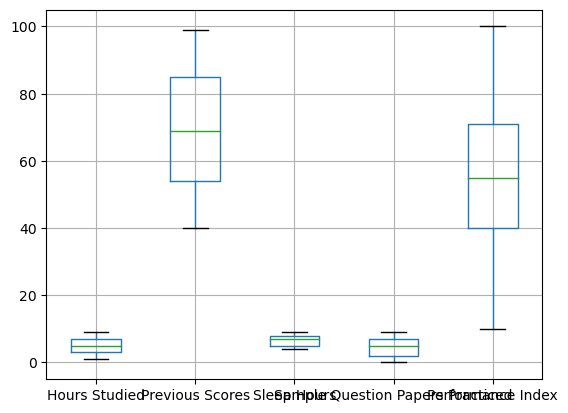

In [19]:
## Checking for outliers

df.boxplot()

In [20]:
## Visualizing the dataset
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


<Axes: >

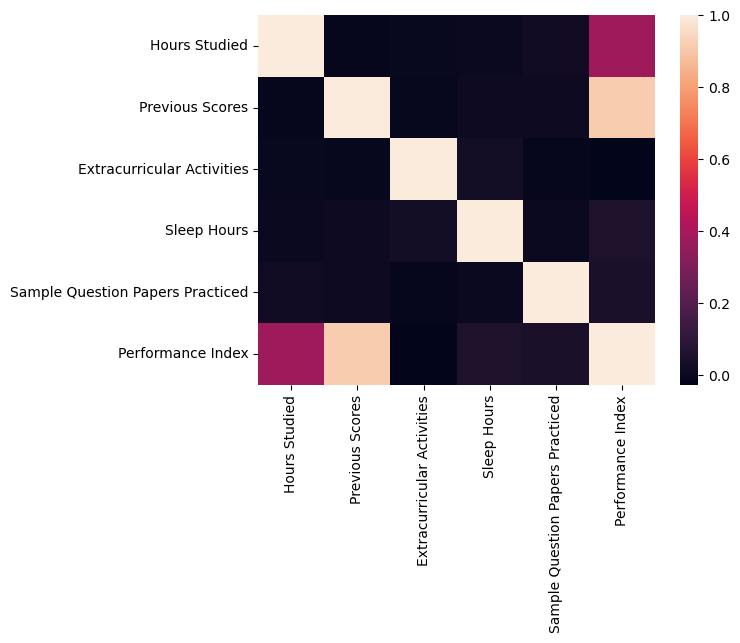

In [36]:
# getting the correlation
corr = df1.corr()
corr

sns.heatmap(corr)

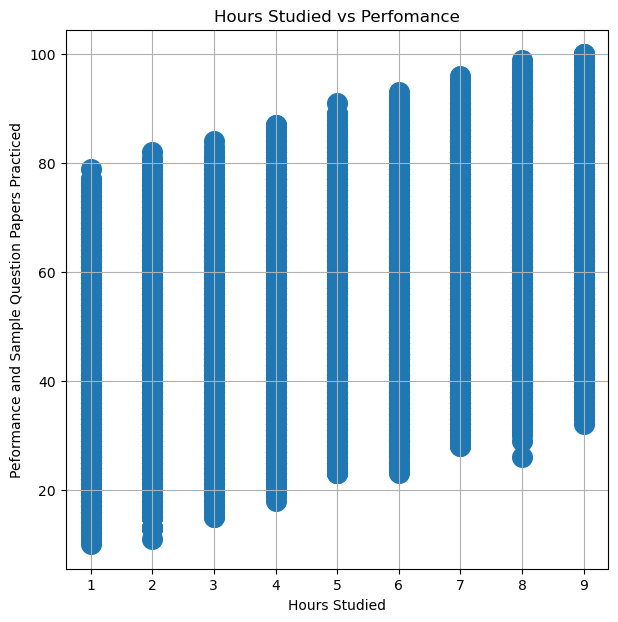

In [35]:
## Relationship between the Hours Studies and the Performance Index

plt.figure(figsize=(7,7))
plt.scatter(df1["Hours Studied"], df1["Performance Index"], s = 200, marker="o")
plt.xlabel("Hours Studied")
plt.ylabel("Peformance and Sample Question Papers Practiced")
plt.grid(True)
plt.title("Hours Studied vs Perfomance", loc = "center")
plt.show()

Text(0.5, 1.0, 'Performance Frequency and Distribution')

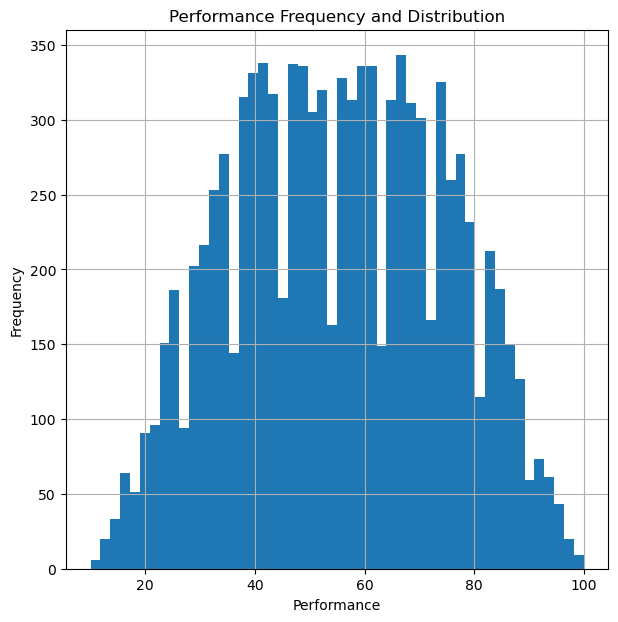

In [38]:
# Most recorded perfromance

plt.figure(figsize=(7,7))
plt.hist(df1["Performance Index"], bins = 50)
plt.xlabel("Performance")
plt.ylabel("Frequency")
plt.grid(True)
plt.title("Performance Frequency and Distribution")

In [39]:
## Building the prediction model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LinearRegression

In [41]:
## defining the dependent and independet variables 

X = df1.drop(["Performance Index"], axis = 1)
y = df1["Performance Index"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [43]:
lr = LinearRegression()

In [44]:
## fitting the model

model = lr.fit(X_train, y_train)
model

LinearRegression()

In [45]:
## predicting the model

pred = lr.predict(X_test)

In [46]:
pred

array([18.5377024 , 73.17680056, 74.10616641, ..., 45.25387922,
       35.0206373 , 54.63104174])

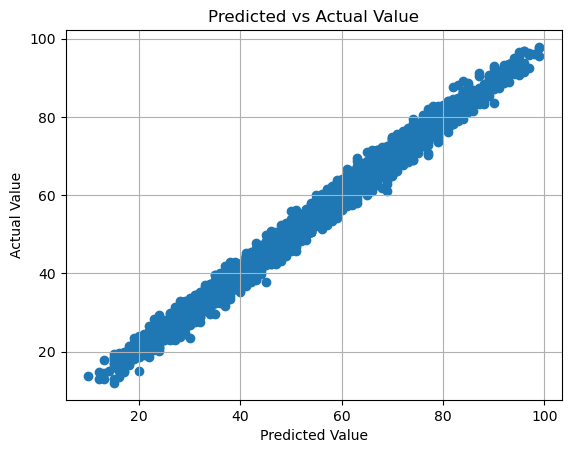

In [50]:
## pLotting the results

plt.scatter(y_test, pred)
plt.grid()
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Predicted vs Actual Value", loc = "center")
plt.show()

In [51]:
## checking the coefficient of determination of the model

r2_score(pred,y_test)

0.9882065452804357

### Conclusion: The model is a good predictor of student perfomance as the accuracy score is 98%.